In [ ]:
%pip install opencv-python-headless
import cv2
import matplotlib.pyplot as plt
import numpy as np

from pipeline.preprocessing import load_images_from_folder
from pipeline.features import detect_features, anms
from pipeline.matching import match_descriptors, draw_matches
from pipeline.ransac import ransac_homography
from pipeline.stitching import stitch_images_with_blending

  Using cached opencv_python_headless-4.11.0.86-cp37-abi3-macosx_13_0_arm64.whl.metadata (20 kB)
Using cached opencv_python_headless-4.11.0.86-cp37-abi3-macosx_13_0_arm64.whl (37.3 MB)

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Cargamos las Imágenes

In [10]:
images_color, images_gray = load_images_from_folder("img", target_width=480)
img0, img1, img2 = images_color[3:6]  # cuadro_0.jpg a cuadro_2.jpg
gray0, gray1, gray2 = images_gray[3:6]

## Detectamos Features y aplicamos ANMS

In [11]:
kp0, desc0 = detect_features(gray0)
kp0, desc0 = anms(kp0, desc0, N=200)

kp1, desc1 = detect_features(gray1)
kp1, desc1 = anms(kp1, desc1, N=200)

kp2, desc2 = detect_features(gray2)
kp2, desc2 = anms(kp2, desc2, N=200)

## Match entre img0 - img1 e img2 - img1

In [12]:
matches_01 = match_descriptors(desc0, desc1, method="lowe", ratio_thresh=0.8)
matches_21 = match_descriptors(desc2, desc1, method="lowe", ratio_thresh=0.8)

In [13]:
pts0 = np.float32([kp0[m.queryIdx].pt for m in matches_01])
pts1_01 = np.float32([kp1[m.trainIdx].pt for m in matches_01])
H01, inliers_01 = ransac_homography(pts0, pts1_01)

pts2 = np.float32([kp2[m.queryIdx].pt for m in matches_21])
pts1_21 = np.float32([kp1[m.trainIdx].pt for m in matches_21])
H21, inliers_21 = ransac_homography(pts2, pts1_21)

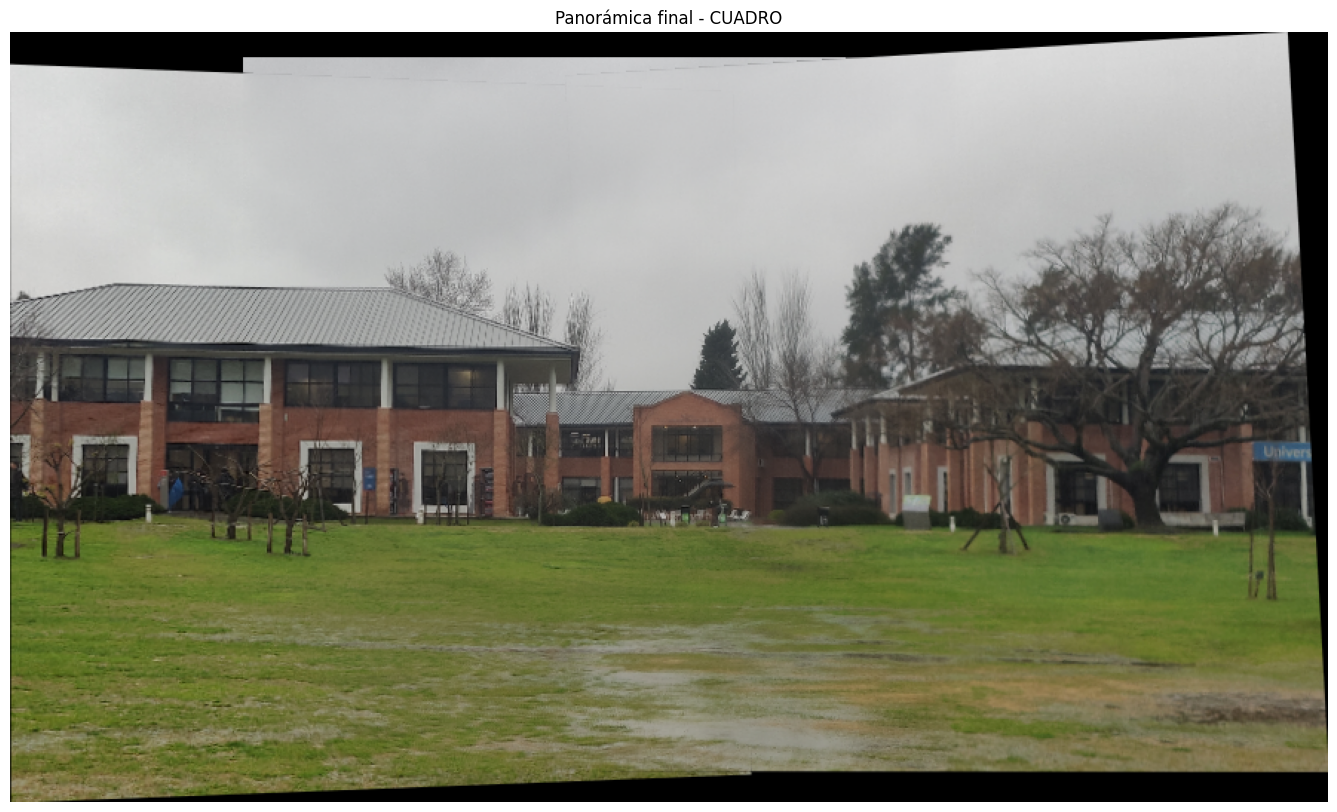

In [16]:
panorama = stitch_images_with_blending(img0, img1, img2, H01, H21)

plt.figure(figsize=(20, 10))
plt.imshow(cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Panorámica final - CUADRO")
plt.show()